# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [399]:
#ваш код
import pandas as pd

df = pd.read_csv('./Advertising.csv', index_col=0)
display(df)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [400]:
#ваш код
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [401]:
#ваш код
#Пропусков в данных нет

**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [402]:
#ваш код
import numpy as np

X = np.array(df[['TV', 'radio', 'newspaper']])
y= np.array(df[ 'sales'])

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [403]:
import numpy as np

X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
#y = y.reshape(-1, 1)
y = y.reshape(-1)
print(X.shape, y.shape)

(200, 4) (200,)


**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [404]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм координатного спуска для случая нормализованных данных:

**Задано:**

* $X=(x_{ij})$ - матрица наблюдений, размерностью $dim(X)=(n, m)$
* $N=1000$ - количество итераций

**Примечание:** *1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.*

**Алгоритм (математическая запись):**
* Создать нулевой вектор параметров $w_0=(0, 0,..., 0)^T$
* Для всех $t=1, 2, ..., N$ итераций:
    * Для всех $k = 1, 2,..., m$:
        * Фиксируем значение всех признаков, кроме $k$-ого и вычисляем прогноз модели линейной регрессии.Для этого исключаем признак $k$-ый из данных и $w_j$ из параметров при построении прогноза.
        Математически это можно записать следующим образом:

        $$h_i = \sum_{j=1}^{k-1} x_{ij}w_{j} + \sum_{j=k+1}^{m} x_{ij}w_j $$

        **Примечание:**
        
        *Обратите, что в данной записи текущий признак под номером $k$ не участвует в сумме.Сравните эту запись с классической записью прогноза линейной регрессии в случае нормированных данных (когда участвуют все признаки):*

        $$h_i = \sum_{j=1}^{m} x_{ij}w_{j}$$ 
        
        * Вычисляем новое значение параметра $k$-ого коэффициента: 
        $$w_k = \sum_{i=1}^{n} x_{ik} (y_i - h_i) = x_k^T(y-h) $$

    * Вычисляем значение функции потерь и сохраняем в историю изменения функции потерь (В оценке функции потерь участвуют все признаки):
        $$\hat{y_i} = \sum_{j=1}^{m}x_{ij}w_j$$
        $$Loss_t = \frac{1}{n} \sum_{i=1}^{n}(y_i-\hat{y_i})^2$$
        
        или в векторном виде:
        
        $$\hat{y} = Xw$$
        $$Loss_t = \frac{1}{n}(y-\hat{y})^T(y-\hat{y})$$
    



**Алгоритм (псевдокод):**
```python

num_iters = #количество итераций
m = # количество строк в матрице X
n = # количество столбцов в матрице X
w = #вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum((X @ w) - y) ** 2)/(len(y))

```

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [405]:
# ваш код 
num_iters = 1000
m = X.shape[0]
n = X.shape[1]
w = np.zeros(n, dtype=float)

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum(((X @ w) - y) ** 2) / (len(y))

display(w)

array([ 41.56217205, 110.13144155,  73.52860638,  -0.55006384])

Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [406]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
 
print(model.coef_)

[ 41.56217205 110.13144155  73.52860638  -0.55006384]


Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [407]:
X = np.array(df[['TV', 'radio', 'newspaper']])
display(np.mean(X, axis=0))
display(np.std(X, axis=0))


array([147.0425,  23.264 ,  30.554 ])

array([85.63933176, 14.80964564, 21.72410606])

In [408]:
#ваш код
X = np.array(df[['TV', 'radio', 'newspaper']])

for j in range(X.shape[1]):
    X[:,j] = (X[:,j] - np.mean(X, axis=0)[j]) / np.std(X, axis=0)[j]

**Добавим единичный столбец**

In [409]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [410]:
#ваш код
def mse_error(y, y_perd):
    e = y - y_perd
    return (e.T @ e) / e.shape[0]

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [411]:
#ваш код
y_pred_coarse = np.full(shape=y.shape, fill_value=np.mean(y))

display(f'Среднеквадратическая ошибка при наивном прогнозе: {mse_error(y, y_pred_coarse)}')

'Среднеквадратическая ошибка при наивном прогнозе: 27.085743750000002'

**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [412]:
#ваш код
def lin_pred(X, w):
    return X @ w

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [413]:
#ваш код
def stoch_grad_step(X, y, w, train_ind, eta):
    #w_diff = X[train_ind, : ] * 2 * (X[train_ind, : ].T @ (w - y[train_ind])) / X.shape[0]
    w_diff = X[train_ind, : ] * 2 * (lin_pred(X[train_ind, : ], w) - y[train_ind]) / X.shape[0]

    return w - eta * w_diff

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [414]:
# ваш код
def stochastic_gradient_descent(X, y, w_0, eta, max_iter, target_w_dist):
    import random
    from numpy.linalg import norm

    w_dist = 1000000
    err_list = []
    w_cur = w_0
    
    for i in range(max_iter):
        if w_dist <= target_w_dist:
            display(f'Достигнуто минимальное расстояние между векторами параметров: {w_dist} за {i} итераций')
            break
        ind = random.randint(0, X.shape[0]-1)
        y_pred = lin_pred(X, w_cur)
        err_list.append(mse_error(y, y_pred))
        w_new = stoch_grad_step(X, y, w_cur, ind, eta)
        w_dist = norm(w_new - w_cur, ord=2)
        w_cur = w_new
        if i == max_iter-1:
            display(f'Произведено максимальное количество итераций: {max_iter}')
    return (w_new, err_list)

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

'Достигнуто минимальное расстояние между векторами параметров: 3.941425029615124e-05 за 576 итераций'

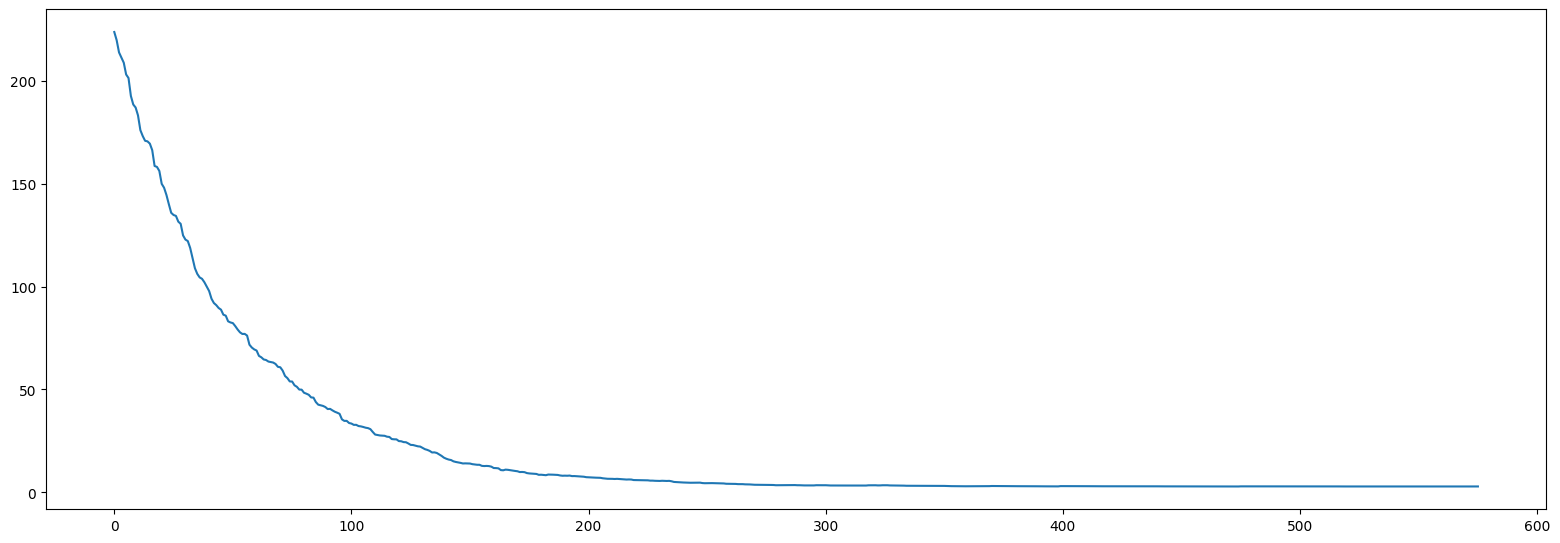

In [415]:
# ваш код
import matplotlib.pyplot as plt

w_0 = np.array([0,0,0,0])
eta = 1
max_iter = 10**5
target_w_dist = 0.0001

w, errors = stochastic_gradient_descent(X, y, w_0, eta, max_iter, target_w_dist)

fig = plt.figure(figsize=(15, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(list(range(len(errors))), errors)

**Выведите вектор весов, к которому сошелся метод.**

In [416]:
# ваш код
display(f'Найденный вектор весов: {w}')

'Найденный вектор весов: [14.00960951  4.07316544  2.9938559  -0.17140407]'

**Выведите среднеквадратичную ошибку на последней итерации.**

In [417]:
# ваш код
display(errors[-1])

2.8503955045868925